In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the Dataset

In [4]:
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data Science Class resources/DSData-master/bike_sharing.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
df.shape

(731, 16)

In [9]:
#Checking the null values(if any)

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

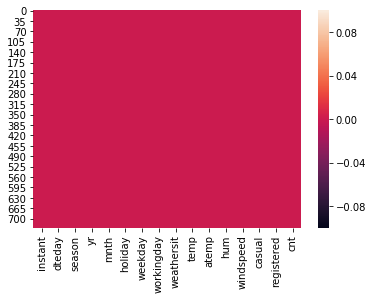

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
#Dropping the columns using drop function
df.drop(['instant'],axis=1,inplace=True)
df.drop(['dteday'],axis=1,inplace=True)

In [13]:
#Statitical Summary of the data

In [14]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
#checking the correlation
dfcor=df.corr()

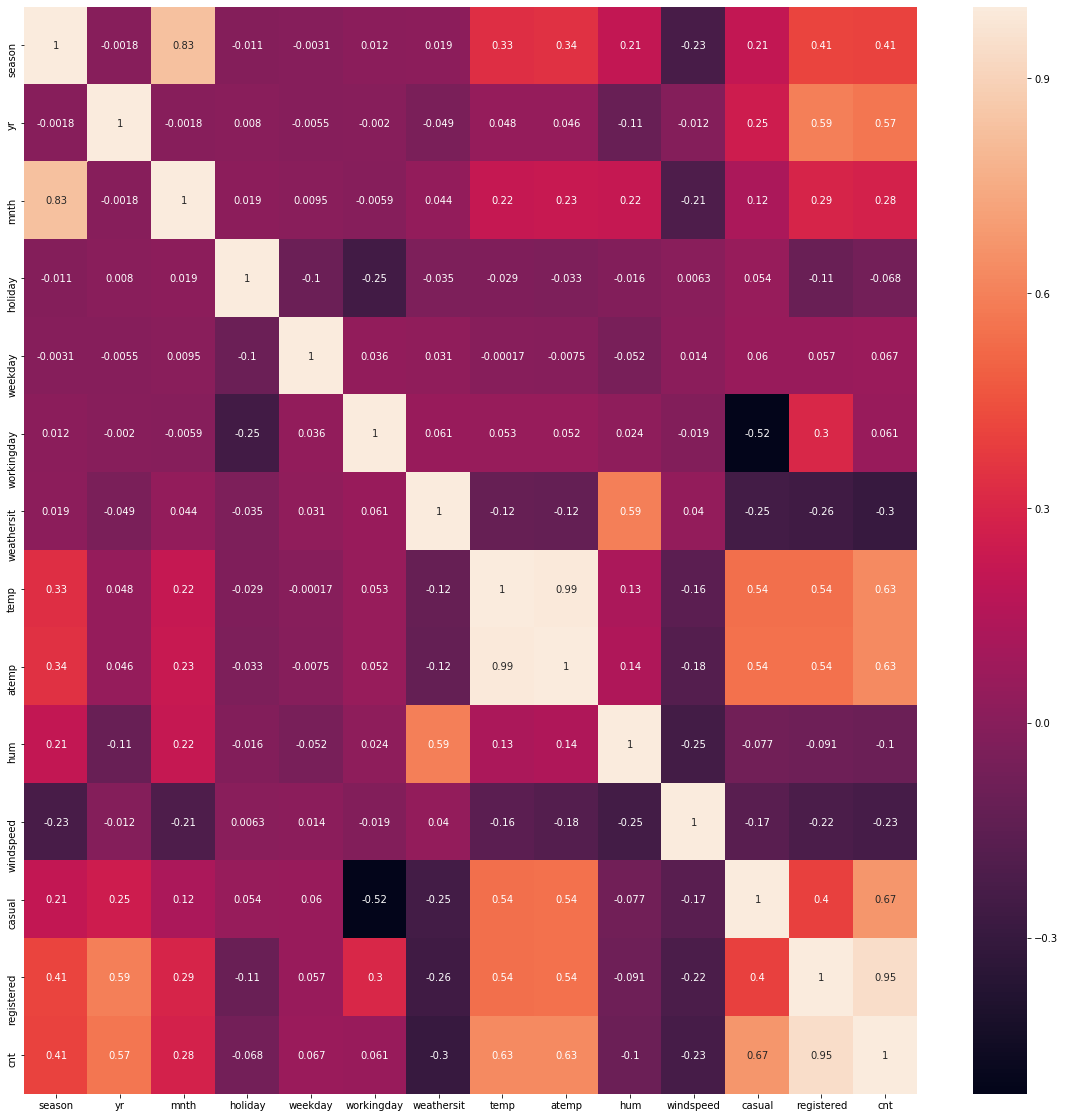

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True)
plt.show()

# Univariate Analysis

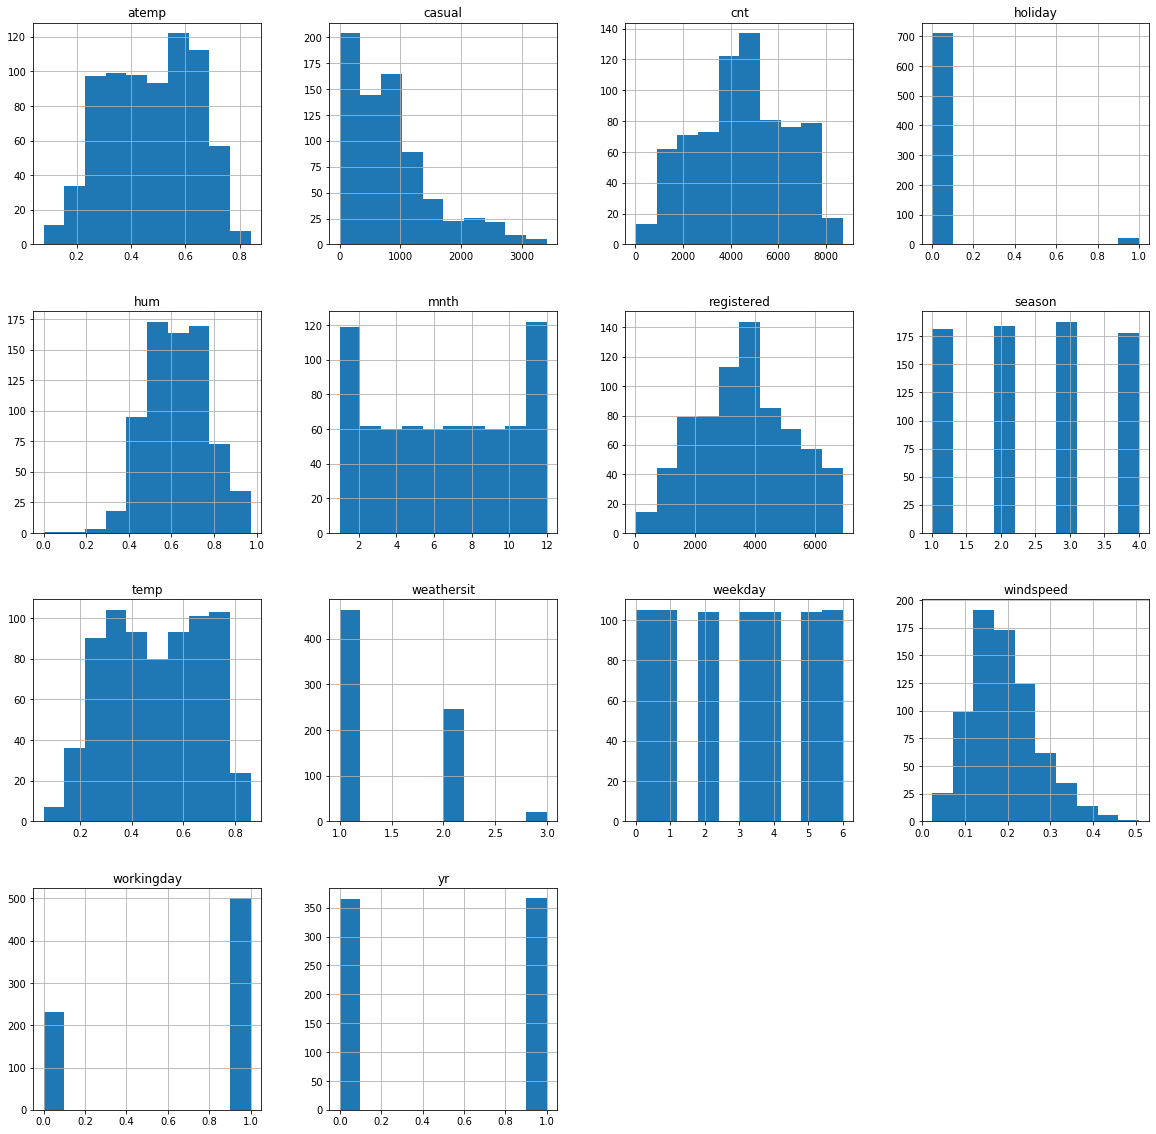

In [17]:
df.hist(figsize=(20,20))
plt.show()

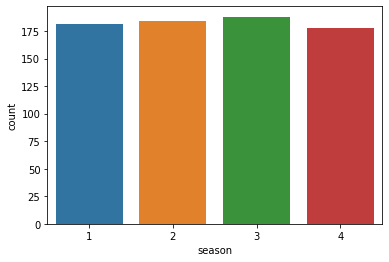

In [18]:
sns.countplot(df['season'])
plt.show()

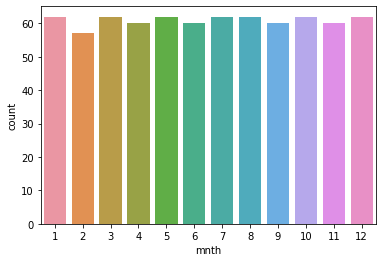

In [19]:
sns.countplot(df['mnth'])
plt.show()

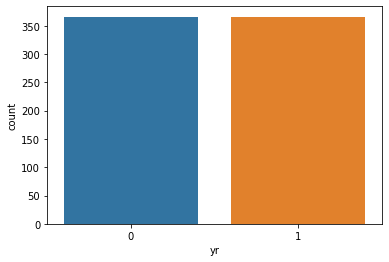

In [20]:
sns.countplot(df['yr'])
plt.show()

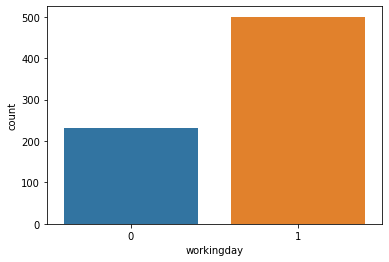

In [21]:
sns.countplot(df['workingday'])
plt.show()

# Bivariate Analysis

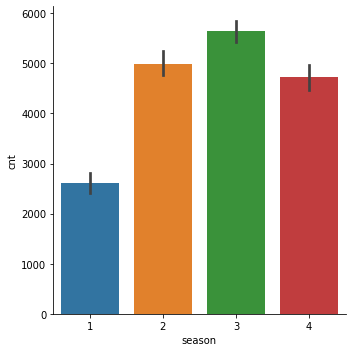

In [22]:
sns.catplot(x='season',y='cnt',data=df,kind='bar')
plt.show()

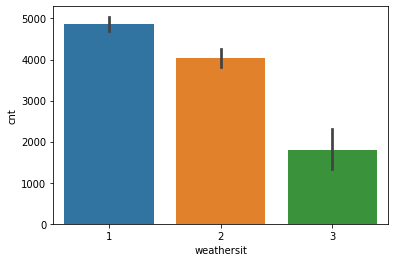

In [23]:
sns.barplot(x="weathersit",y="cnt",data=df)
plt.show()

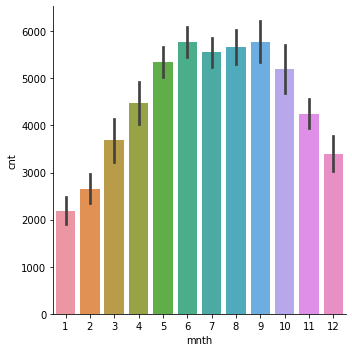

In [24]:
sns.catplot(x='mnth',y='cnt',data=df,kind='bar')
plt.show()

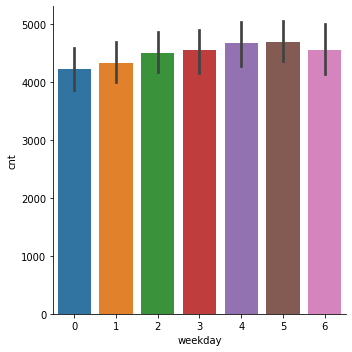

In [25]:
sns.catplot(x='weekday',y='cnt',data=df,kind='bar')
plt.show()

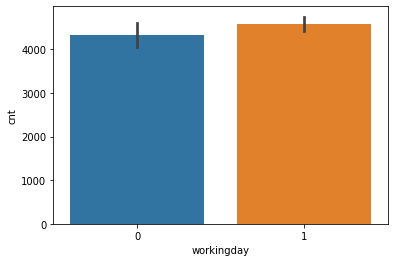

In [26]:
sns.barplot(x="workingday",y="cnt",data=df)
plt.show()

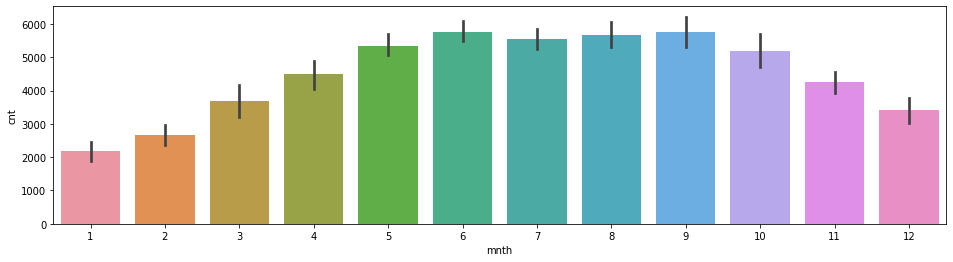

In [27]:
plt.figure(figsize=(16,4))
sns.barplot(x="mnth",y="cnt",data=df)
plt.show()

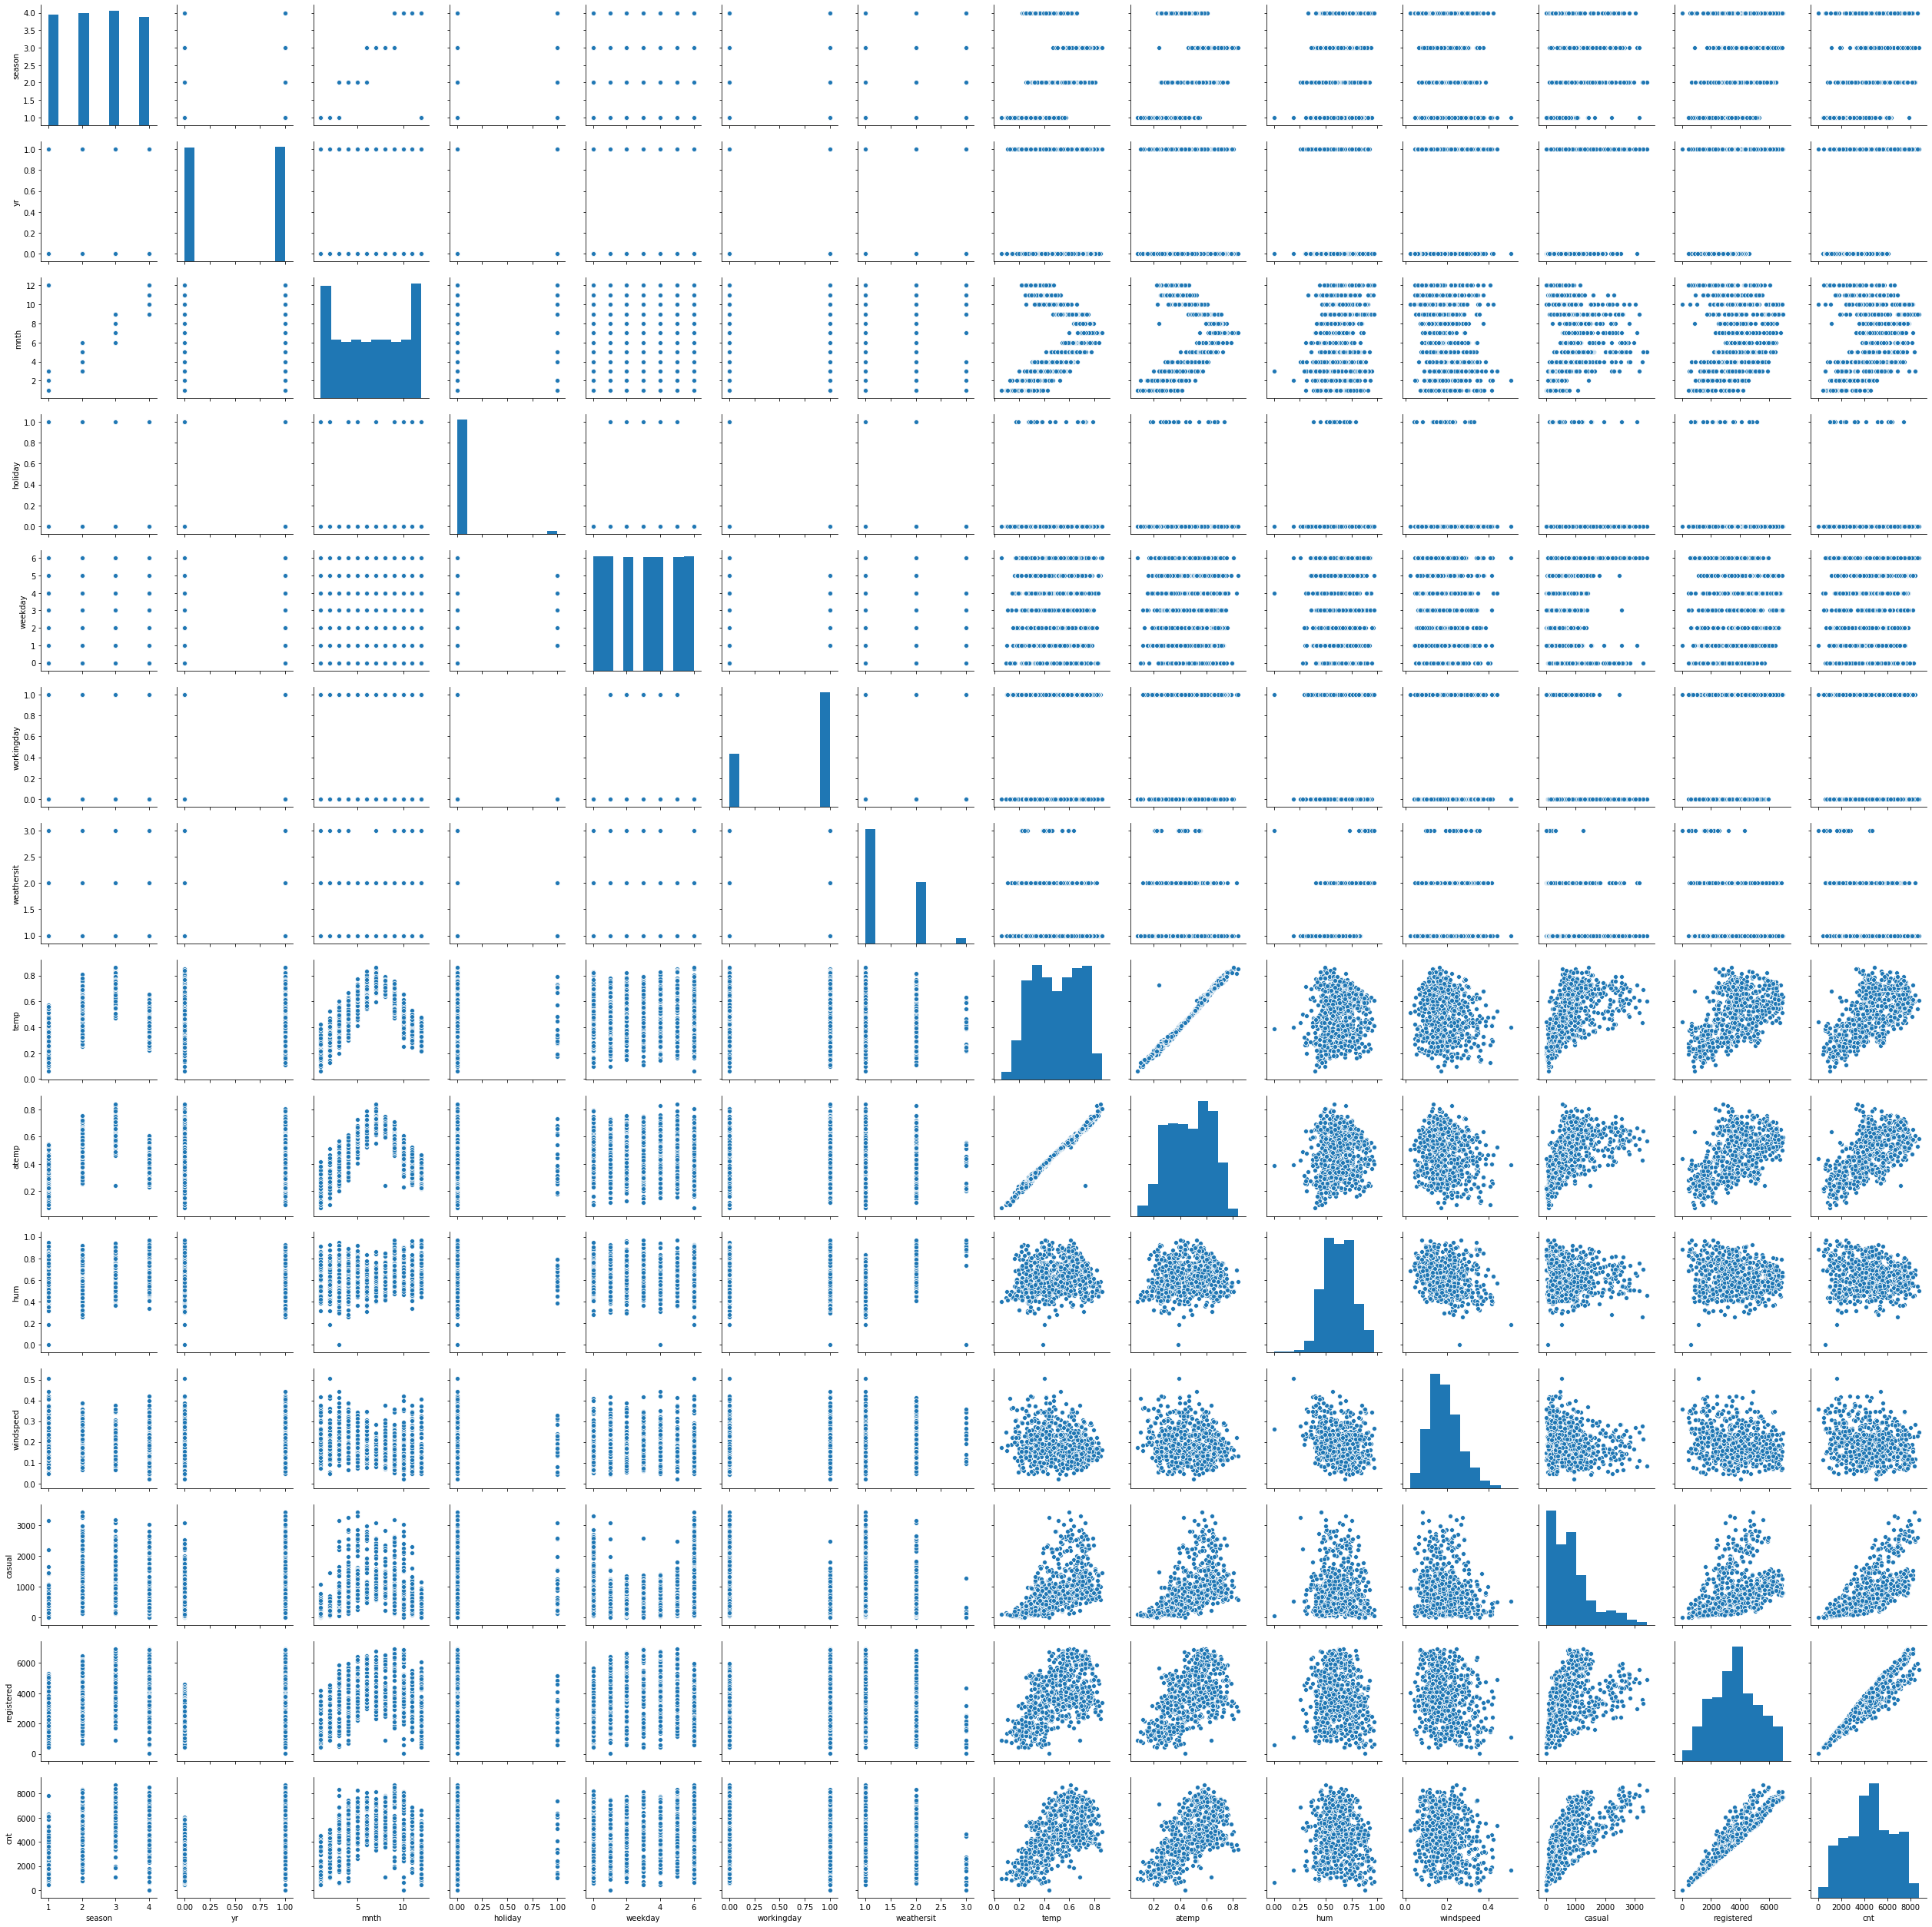

In [28]:
sns.pairplot(df)
plt.show()

In [29]:
collist=df.columns.values
ncol=12
nrows=10

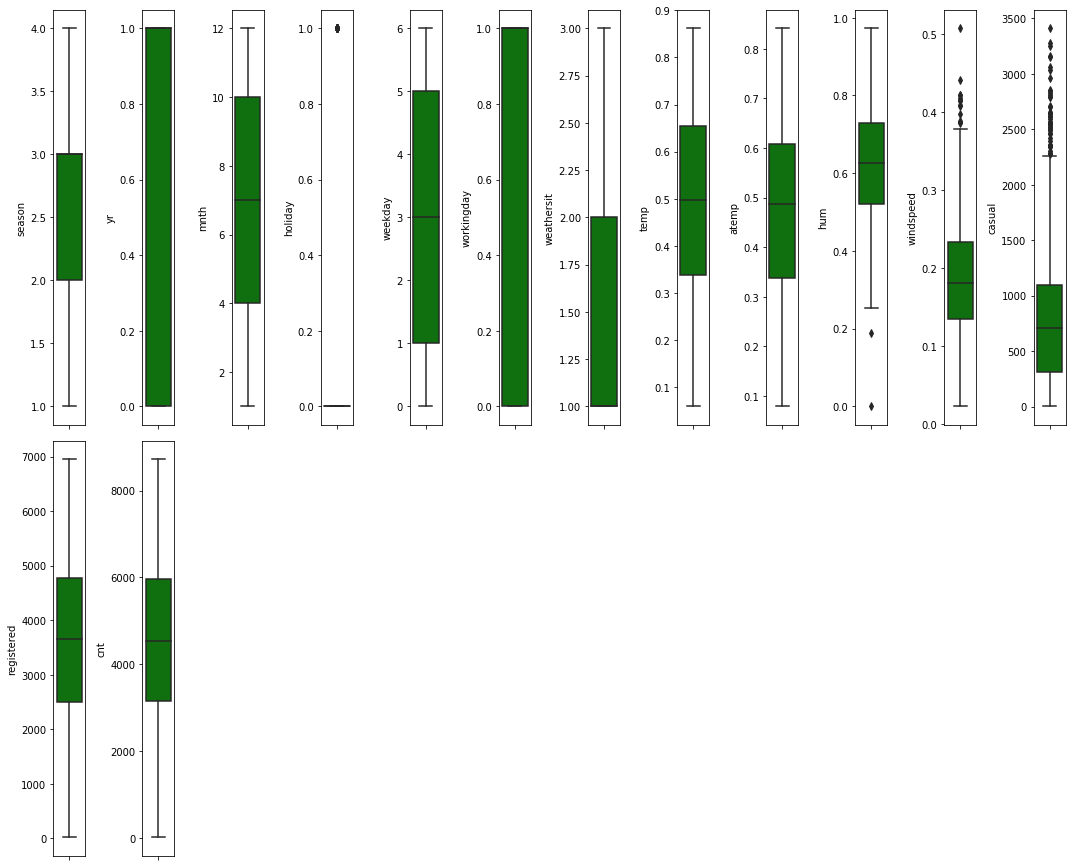

In [30]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

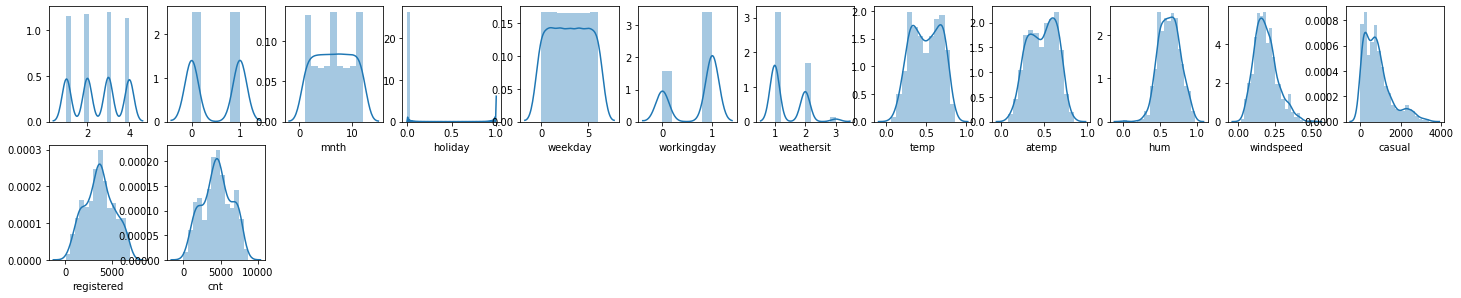

In [31]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [32]:
#Checking the skewness of the data

In [33]:
df.skew()

season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.957385
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
cnt          -0.047353
dtype: float64

In [34]:
#As there are few skewed values, we try correct it by using log transformation
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.cbrt(df[col])

In [35]:
df.skew()

season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.754889
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed    -0.108906
casual       -0.001455
registered    0.043659
cnt          -0.047353
dtype: float64

In [36]:
#Checking the Zscore for outliers and removing (if any)
from scipy.stats import zscore
z_score=abs(zscore(df))
df.shape

(731, 14)

In [37]:
df_final=df.loc[(z_score<3).all(axis=1)]
df_final.shape

(707, 14)

In [38]:
df_x=df.drop(columns=['cnt'])
y=df[['cnt']]

In [39]:
#Scaling the data using StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.25,random_state=45)

In [41]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(548, 13) (183, 13)
(548, 1) (183, 1)


In [42]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)
XGR=XGBRegressor(random_state=42)

In [43]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [44]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,df_x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.986233227257737
Mean_Squared_Error = 50582.92114361043
Cross_Val_Score =  0.8958219580338701


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.9861430137992484
Mean_Squared_Error = 50914.39027891565
Cross_Val_Score =  0.8976093808944002


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.9863111449638966
Mean_Squared_Error = 50296.629994613315
Cross_Val_Score =  0.8964472310336271


*********************

In [45]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.986233,50582.921,0.896
1,Lasso,0.986143,50914.390,0.898
2,Ridge,0.986311,50296.630,0.896
3,ElasticNet,0.927397,266762.640,0.598
4,DecisionTreeRegressor,0.979242,76271.814,0.931
5,KNeighborsRegressor,0.902324,358886.941,0.026
6,AdaBoostRegressor,0.973778,96347.097,0.819
7,RandomForestRegressor,0.993031,25605.980,0.967
8,GradientBoostingRegressor,0.995240,17487.806,0.982
9,XGBRegressor,0.994529,20103.101,0.968


In [1]:
#Lets Do Hyperparameter tuning using GridSearchCV

In [46]:
parameterGBR={
            'n_estimators':[100,200,300], 
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4,3], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] 
            } 
gridGBR = GridSearchCV(GBR, param_grid=parameterGBR, n_jobs=-1, cv=10)
gridGBR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [47]:
gridGBR.best_score_ , gridGBR.best_params_

(0.9968784655715197,
 {'learning_rate': 0.1,
  'loss': 'ls',
  'max_depth': 4,
  'max_features': 1.0,
  'min_samples_leaf': 3,
  'n_estimators': 300})

In [56]:
GBR=GradientBoostingRegressor(learning_rate= 0.1,
  loss='ls',
  max_depth= 4,
  max_features= 1.0,
  min_samples_leaf= 3,
  n_estimators= 300)
GBR.fit(x_train,y_train)
score=cross_val_score(GBR,df_x,y,cv=10,scoring='r2').mean()

In [57]:
print(score)

0.98275692089748


In [48]:
from sklearn.externals import joblib
joblib.dump(GBR,'bike_sharing_GBR.pkl')

['bike_sharing_GBR.pkl']